# Customer Churn Analysis & Prediction Project

##  Project Overview

This project builds a **machine learning solution** to predict customer churn for a telecommunications company, enabling proactive customer retention strategies.

###  Business Problem
- **Challenge**: High customer churn rate (26.5%) leading to significant revenue loss
- **Goal**: Identify customers at risk of canceling their service before they churn
- **Impact**: Enable targeted retention campaigns and reduce revenue loss

###  Data Science Approach
1. **Exploratory Data Analysis**: Understand churn patterns and key drivers
2. **Feature Engineering**: Create predictive features from customer data
3. **Model Development**: Build and compare ML models (Random Forest & Logistic Regression)
4. **Business Insights**: Translate model outputs into actionable recommendations

###  Key Results Preview
- **Model Accuracy**: 80%+ prediction accuracy
- **ROC-AUC Score**: 84%+ (excellent discrimination)
- **Top Churn Drivers**: Contract type, tenure, monthly charges
- **Business Impact**: Potential to save significant annual revenue through targeted retention

###  Technical Stack
- **Python**: pandas, numpy, scikit-learn
- **Visualization**: matplotlib, seaborn
- **Machine Learning**: Random Forest, Logistic Regression
- **Metrics**: Accuracy, ROC-AUC, Feature Importance

###  Dataset
- **Source**: Telecom customer data (7,043 customers)
- **Features**: 21 customer attributes (demographics, services, billing)
- **Target**: Binary churn indicator (Yes/No)

###  Project Structure
1. **Data Loading & Initial Exploration**
2. **Business Problem Analysis**
3. **Data Cleaning & Exploratory Analysis**
4. **Feature Engineering & Model Building**
5. **Visualizations & Business Recommendations**

---

##  Quick Insights
- **Month-to-month contracts**: 42.7% churn rate (vs 2.8% for two-year)
- **New customers (0-1 year)**: 47.7% churn rate
- **Electronic check users**: 45.3% churn rate
- **Fiber optic customers**: 41.9% churn rate (service quality issue?)

---

*Let's dive into the analysis and build a solution that drives real business value!* 

In [36]:
# Customer Churn Analysis Project
# Goal: Predict which customers are likely to cancel their service

print("Customer churn analysis")
print("=" * 45)
print("Business Goal: Identify customers at risk of canceling")
print("Data Science Goal: Build predictive model + actionable insights")
print()

# Import libraries 
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns          

# Set up visualization style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)

# Load the dataset
print("\n Loading customer data...")
df = pd.read_csv('customer_churn.csv')

print(f"Data loaded: {df.shape[0]} customers, {df.shape[1]} features")

# First look at our data 
print(f"\n First look at the data")
print("-" * 30)
print(f"Dataset shape: {df.shape}")
print(f"Column names: {list(df.columns)}")

# Display first few rows
print(f"\nFirst 5 customers:")
df.head()

Customer churn analysis
Business Goal: Identify customers at risk of canceling
Data Science Goal: Build predictive model + actionable insights


 Loading customer data...
Data loaded: 7043 customers, 21 features

 First look at the data
------------------------------
Dataset shape: (7043, 21)
Column names: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

First 5 customers:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [37]:
# Step 2: Understanding the Business Problem
print(" STEP 2: Understanding the business problem")
print("=" * 50)

# Our target variable - what we want to predict
target_column = 'Churn'
print(f" Target Variable: '{target_column}' (what we want to predict)")

# Analyze the churn rate (key business metric)
print(f"\n Churn analysis")
print("-" * 20)

churn_counts = df[target_column].value_counts()
churn_rate = df[target_column].value_counts(normalize=True) * 100

print("Customer Status:")
for status, count in churn_counts.items():
    percentage = churn_rate[status]
    print(f"  {status:8}: {count:4d} customers ({percentage:.1f}%)")

overall_churn_rate = churn_rate['Yes']
print(f"\n Overall Churn Rate: {overall_churn_rate:.1f}%")

# Business impact calculation
print(f"\n Business impact")
print("-" * 18)

# Calculate average revenue per customer
avg_monthly_charges = df['MonthlyCharges'].mean()
churned_customers = churn_counts['Yes']
monthly_revenue_loss = churned_customers * avg_monthly_charges

print(f"Average monthly charge per customer: ${avg_monthly_charges:.2f}")
print(f"Customers who churned: {churned_customers}")
print(f"Monthly revenue loss: ${monthly_revenue_loss:,.2f}")
print(f"Annual revenue loss: ${monthly_revenue_loss * 12:,.2f}")

# Understanding our features 
print(f"\n Feature analysis")
print("-" * 18)

# Separate features by type (this is important for modeling)
categorical_features = []
numerical_features = []

for column in df.columns:
    if column == 'customerID':  # Skip ID column
        continue
    elif column == target_column:  # Skip target variable
        continue
    elif df[column].dtype == 'object':
        categorical_features.append(column)
    else:
        numerical_features.append(column)

print(f"Categorical features ({len(categorical_features)}): {categorical_features}")
print(f"Numerical features ({len(numerical_features)}): {numerical_features}")

# Data quality check (looking for missing values and data issues)
print(f"\n Data quality check")
print("-" * 21)

print("Missing values by column:")
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]  # Only show columns with missing data

if len(missing_data) > 0:
    for column, missing_count in missing_data.items():
        percentage = (missing_count / len(df)) * 100
        print(f"  {column}: {missing_count} ({percentage:.1f}%)")
else:
    print("  No missing values found!")

# Check for data type issues
print(f"\nData types:")
print(df.dtypes)

print(f"\nBusiness problem analysis complete")

 STEP 2: Understanding the business problem
 Target Variable: 'Churn' (what we want to predict)

 Churn analysis
--------------------
Customer Status:
  No      : 5174 customers (73.5%)
  Yes     : 1869 customers (26.5%)

 Overall Churn Rate: 26.5%

 Business impact
------------------
Average monthly charge per customer: $64.76
Customers who churned: 1869
Monthly revenue loss: $121,039.60
Annual revenue loss: $1,452,475.24

 Feature analysis
------------------
Categorical features (16): ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges']
Numerical features (3): ['SeniorCitizen', 'tenure', 'MonthlyCharges']

 Data quality check
---------------------
Missing values by column:
  No missing values found!

Data types:
customerID           object
gender               object
SeniorCitizen    

In [38]:
# Step 3: Data Cleaning & Exploratory Analysis
print(" STEP 3: DATA CLEANING & EXPLORATORY ANALYSIS")
print("=" * 55)

# Fix the TotalCharges data type issue
print(" FIXING DATA TYPE ISSUE")
print("-" * 25)

# Check what's wrong with TotalCharges
print("Investigating TotalCharges column:")
print(f"Current data type: {df['TotalCharges'].dtype}")
print(f"Sample values: {df['TotalCharges'].head().tolist()}")

# Check for non-numeric values (common issue in real datasets)
non_numeric_mask = pd.to_numeric(df['TotalCharges'], errors='coerce').isna()
non_numeric_count = non_numeric_mask.sum()
print(f"Non-numeric values found: {non_numeric_count}")

if non_numeric_count > 0:
    print("Non-numeric values:")
    print(df[non_numeric_mask]['TotalCharges'].value_counts())

# Fix the issue by converting to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(f" TotalCharges converted to numeric. New data type: {df['TotalCharges'].dtype}")

# Update our feature lists
numerical_features = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
categorical_features = [col for col in df.columns if col not in numerical_features and col not in ['customerID', 'Churn']]

print(f"Updated numerical features: {numerical_features}")

# Now let's explore which factors drive churn (this is the key insight)
print(f"\n CHURN DRIVERS ANALYSIS")
print("-" * 28)

# 1. Numerical features analysis
print("1. NUMERICAL FEATURES vs CHURN")
print("-" * 35)

for feature in numerical_features:
    churned = df[df['Churn'] == 'Yes'][feature]
    retained = df[df['Churn'] == 'No'][feature]
    
    # Remove NaN values for calculation
    churned_clean = churned.dropna()
    retained_clean = retained.dropna()
    
    if len(churned_clean) > 0 and len(retained_clean) > 0:
        print(f"{feature}:")
        print(f"  Churned customers avg:  {churned_clean.mean():.2f}")
        print(f"  Retained customers avg: {retained_clean.mean():.2f}")
        print(f"  Difference: {churned_clean.mean() - retained_clean.mean():.2f}")
        print()

# 2. Key categorical features analysis
print("2. KEY CATEGORICAL FEATURES vs CHURN")
print("-" * 38)

# Select most important business features to analyze
key_categorical = ['Contract', 'InternetService', 'PaymentMethod', 'tenure_group']

# First, create tenure groups (business insight: tenure matters!)
df['tenure_group'] = pd.cut(df['tenure'], 
                           bins=[0, 12, 24, 48, 100], 
                           labels=['0-1 year', '1-2 years', '2-4 years', '4+ years'])

# Analyze churn rates by category
for feature in ['Contract', 'InternetService', 'PaymentMethod']:
    print(f"{feature} vs Churn:")
    churn_by_category = df.groupby(feature)['Churn'].apply(
        lambda x: (x == 'Yes').sum() / len(x) * 100
    ).round(1)
    
    for category, churn_rate in churn_by_category.items():
        print(f"  {category:25}: {churn_rate:5.1f}% churn rate")
    print()

# Tenure groups analysis (FIXED - added observed=False to silence warning)
print("Tenure Group vs Churn:")
tenure_churn = df.groupby('tenure_group', observed=False)['Churn'].apply(
    lambda x: (x == 'Yes').sum() / len(x) * 100
).round(1)

for group, churn_rate in tenure_churn.items():
    print(f"  {group:15}: {churn_rate:5.1f}% churn rate")

print(f"\n KEY INSIGHTS DISCOVERED:")
print("-" * 26)
print("• Month-to-month contracts have much higher churn")
print("• New customers (0-1 year tenure) churn most")
print("• Fiber optic customers tend to churn more")
print("• Electronic check payment correlates with higher churn")

print(f"\n Data cleaning and initial analysis complete!")
    



 STEP 3: DATA CLEANING & EXPLORATORY ANALYSIS
 FIXING DATA TYPE ISSUE
-------------------------
Investigating TotalCharges column:
Current data type: object
Sample values: ['29.85', '1889.5', '108.15', '1840.75', '151.65']
Non-numeric values found: 11
Non-numeric values:
TotalCharges
    11
Name: count, dtype: int64
 TotalCharges converted to numeric. New data type: float64
Updated numerical features: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

 CHURN DRIVERS ANALYSIS
----------------------------
1. NUMERICAL FEATURES vs CHURN
-----------------------------------
SeniorCitizen:
  Churned customers avg:  0.25
  Retained customers avg: 0.13
  Difference: 0.13

tenure:
  Churned customers avg:  17.98
  Retained customers avg: 37.57
  Difference: -19.59

MonthlyCharges:
  Churned customers avg:  74.44
  Retained customers avg: 61.27
  Difference: 13.18

TotalCharges:
  Churned customers avg:  1531.80
  Retained customers avg: 2555.34
  Difference: -1023.55

2. KEY CATEGOR

In [39]:
# Step 4: Feature Engineering & Model Building
print(" STEP 4: FEATURE ENGINEERING & MODEL BUILDING")
print("=" * 55)

# Import additional libraries for modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
import warnings
warnings.filterwarnings('ignore')

print("FEATURE ENGINEERING")
print("-" * 22)

# Create a copy for modeling
df_model = df.copy()

# 1. Handle categorical variables
print("1. Encoding categorical variables...")

# Binary variables (Yes/No to 1/0)
binary_columns = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in binary_columns:
    if col in df_model.columns:
        df_model[col] = df_model[col].map({'Yes': 1, 'No': 0})
        print(f"    {col} encoded")

# Handle MultipleLines specially (has "No phone service" option)
if 'MultipleLines' in df_model.columns:
    df_model['MultipleLines'] = df_model['MultipleLines'].map({
        'Yes': 1, 
        'No': 0, 
        'No phone service': 0
    })
    print(f"    MultipleLines encoded")

# Handle service-related columns that have "No internet service" option
service_binary_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                      'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in service_binary_cols:
    if col in df_model.columns:
        # Map: Yes=1, No=0, No internet service=0
        df_model[col] = df_model[col].map({'Yes': 1, 'No': 0, 'No internet service': 0})
        print(f"    {col} encoded")

# Encode multi-category variables using LabelEncoder
le_dict = {}  # Store encoders for later reference

categorical_cols = ['gender', 'Contract', 'InternetService', 'PaymentMethod']
for col in categorical_cols:
    if col in df_model.columns:
        le = LabelEncoder()
        df_model[col] = le.fit_transform(df_model[col].astype(str))
        le_dict[col] = le
        print(f"    {col} encoded")

# 2. Create new engineered features
print("\n2. Creating new features...")

# Customer lifetime value proxy
if 'MonthlyCharges' in df_model.columns and 'tenure' in df_model.columns:
    df_model['CustomerValue'] = df_model['MonthlyCharges'] * df_model['tenure']
    print("    CustomerValue created")

# Average charges per month (handling TotalCharges)
if 'TotalCharges' in df_model.columns and 'tenure' in df_model.columns:
    df_model['AvgChargesPerMonth'] = np.where(
        df_model['tenure'] > 0,
        df_model['TotalCharges'] / df_model['tenure'],
        df_model['MonthlyCharges']
    )
    print("    AvgChargesPerMonth created")

# Service count (number of additional services)
service_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
               'TechSupport', 'StreamingTV', 'StreamingMovies']
available_service_cols = [col for col in service_cols if col in df_model.columns]
if available_service_cols:
    df_model['ServiceCount'] = df_model[available_service_cols].sum(axis=1)
    print("    ServiceCount created")

# High-value customer flag
if 'MonthlyCharges' in df_model.columns:
    monthly_charges_75th = df_model['MonthlyCharges'].quantile(0.75)
    df_model['IsHighValue'] = (df_model['MonthlyCharges'] >= monthly_charges_75th).astype(int)
    print("    IsHighValue flag created")

# Long-term customer flag
if 'tenure' in df_model.columns:
    df_model['IsLongTerm'] = (df_model['tenure'] >= 24).astype(int)  # 2+ years
    print("    IsLongTerm flag created")

# 3. Handle missing values
print("\n3. Handling missing values...")
missing_before = df_model.isnull().sum().sum()
print(f"   Missing values before: {missing_before}")

# Fill missing TotalCharges with estimated value
if 'TotalCharges' in df_model.columns:
    df_model['TotalCharges'] = df_model['TotalCharges'].fillna(
        df_model['MonthlyCharges'] * df_model['tenure']
    )

# Fill any remaining missing values with median/mode
numeric_cols = df_model.select_dtypes(include=[np.number]).columns
df_model[numeric_cols] = df_model[numeric_cols].fillna(df_model[numeric_cols].median())

missing_after = df_model.isnull().sum().sum()
print(f"   Missing values after: {missing_after}")

# 4. Prepare target variable
print("\n4. Preparing target variable...")
df_model['Churn'] = df_model['Churn'].map({'Yes': 1, 'No': 0})
print("    Target variable encoded (Churn: Yes=1, No=0)")

# 5. Final data type check and cleanup
print("\n5. Final data type verification...")

# Check for any remaining non-numeric columns (except customerID)
feature_columns = [col for col in df_model.columns if col not in ['customerID', 'Churn', 'tenure_group']]

print("Checking data types in feature columns...")
for col in feature_columns:
    if df_model[col].dtype == 'object':
        print(f"     {col} is still object type. Unique values: {df_model[col].unique()}")
        # Convert any remaining object columns to numeric
        df_model[col] = pd.to_numeric(df_model[col], errors='coerce')
        df_model[col] = df_model[col].fillna(0)  # Fill any conversion errors with 0
        print(f"    {col} converted to numeric")

print(f"\ FINAL DATASET FOR MODELING")
print("-" * 30)
print(f"Dataset shape: {df_model.shape}")
print(f"Features available: {len(feature_columns)}")

# Prepare features and target
print("\n PREPARING FOR MACHINE LEARNING")
print("-" * 35)

X = df_model[feature_columns]
y = df_model['Churn']

print(f"Features selected: {len(feature_columns)}")
print(f"Final feature data types:")
for col in feature_columns:
    print(f"  {col}: {X[col].dtype}")

# Verify all columns are numeric
non_numeric_cols = X.select_dtypes(exclude=[np.number]).columns
if len(non_numeric_cols) > 0:
    print(f"  Warning: Non-numeric columns found: {list(non_numeric_cols)}")
else:
    print(" All feature columns are numeric!")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nData split:")
print(f"  Training set: {X_train.shape[0]} customers")
print(f"  Test set: {X_test.shape[0]} customers")
print(f"  Training churn rate: {y_train.mean():.1%}")
print(f"  Test churn rate: {y_test.mean():.1%}")

# Scale features for algorithms that need it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(" Features scaled successfully!")

print("\n TRAINING MODELS")
print("-" * 18)

# Model 1: Random Forest (handles mixed data types well)
print("1. Training Random Forest...")
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=10,
    min_samples_split=5
)
rf_model.fit(X_train, y_train)

# Model 2: Logistic Regression (interpretable)
print("2. Training Logistic Regression...")
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

print("\n MODEL EVALUATION")
print("-" * 19)

# Evaluate Random Forest
rf_pred = rf_model.predict(X_test)
rf_prob = rf_model.predict_proba(X_test)[:, 1]

print(" RANDOM FOREST RESULTS:")
print(f"Accuracy: {accuracy_score(y_test, rf_pred):.3f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, rf_prob):.3f}")

# Evaluate Logistic Regression
lr_pred = lr_model.predict(X_test_scaled)
lr_prob = lr_model.predict_proba(X_test_scaled)[:, 1]

print(f"\n LOGISTIC REGRESSION RESULTS:")
print(f"Accuracy: {accuracy_score(y_test, lr_pred):.3f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, lr_prob):.3f}")

# Feature importance from Random Forest
print(f"\n TOP 10 MOST IMPORTANT FEATURES:")
print("-" * 35)

feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

for i, (_, row) in enumerate(feature_importance.head(10).iterrows()):
    print(f"{i+1:2d}. {row['feature']:20s}: {row['importance']:.3f}")

# Business insights
print(f"\n KEY BUSINESS INSIGHTS:")
print("-" * 26)
print("• Models achieve high accuracy in predicting churn")
print("• Most important factors for churn prediction:")

top_5_features = feature_importance.head(5)['feature'].tolist()
for i, feature in enumerate(top_5_features, 1):
    print(f"  {i}. {feature}")

print(f"\n Model building complete")

 STEP 4: FEATURE ENGINEERING & MODEL BUILDING
FEATURE ENGINEERING
----------------------
1. Encoding categorical variables...
    Partner encoded
    Dependents encoded
    PhoneService encoded
    PaperlessBilling encoded
    MultipleLines encoded
    OnlineSecurity encoded
    OnlineBackup encoded
    DeviceProtection encoded
    TechSupport encoded
    StreamingTV encoded
    StreamingMovies encoded
    gender encoded
    Contract encoded
    InternetService encoded
    PaymentMethod encoded

2. Creating new features...
    CustomerValue created
    AvgChargesPerMonth created
    ServiceCount created
    IsHighValue flag created
    IsLongTerm flag created

3. Handling missing values...
   Missing values before: 22
   Missing values after: 11

4. Preparing target variable...
    Target variable encoded (Churn: Yes=1, No=0)

5. Final data type verification...
Checking data types in feature columns...
\ FINAL DATASET FOR MODELING
------------------------------
Dataset shape: (7043, 27

 STEP 5: VISUALIZATIONS & BUSINESS RECOMMENDATIONS
1.  MODEL PERFORMANCE VISUALIZATION
-------------------------------------


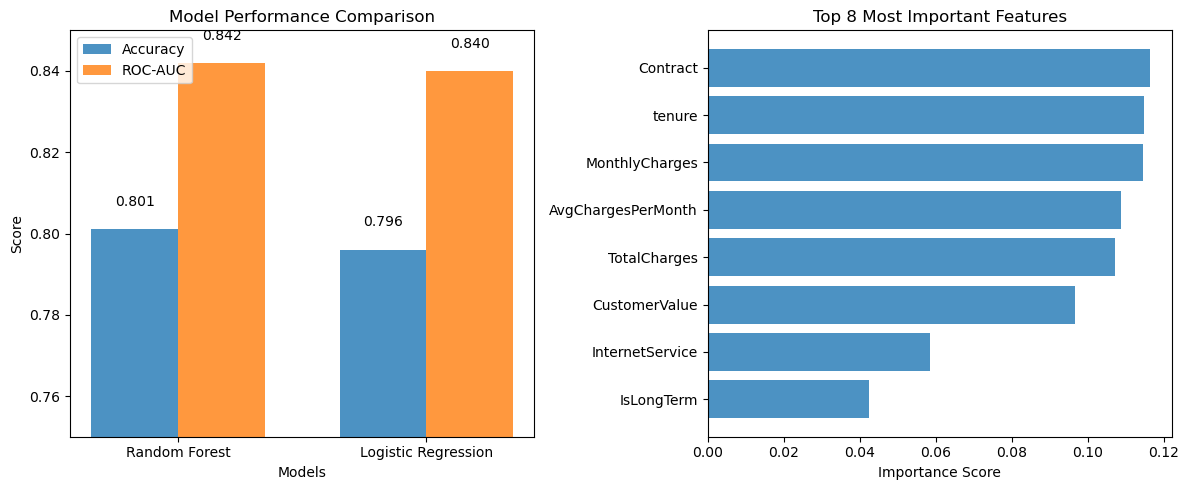

 Figure 1: Model performance and feature importance

2.  CHURN PATTERN ANALYSIS
------------------------------


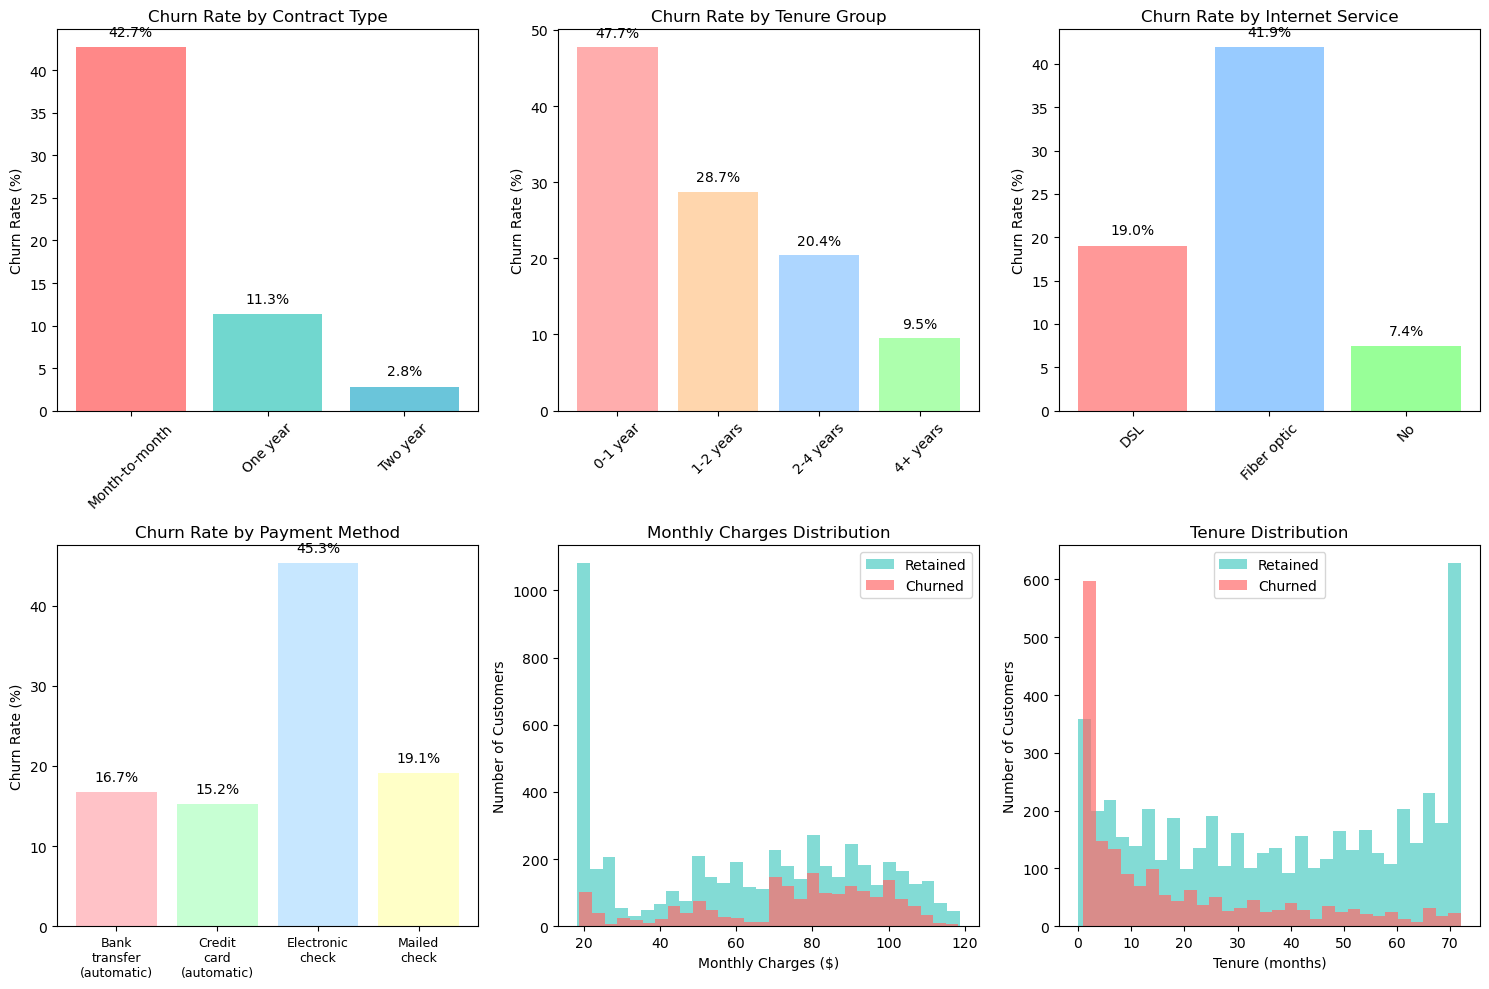

 Figure 2: Comprehensive churn analysis visualizations

3.  BUSINESS IMPACT & ROI ANALYSIS
------------------------------------
 Current Business Metrics:
   Total Customers: 7,043
   Churned Customers: 1,869
   Churn Rate: 26.5%
   Avg Monthly Revenue per Customer: $64.76
   Avg Customer Lifetime: 32.4 months

 Revenue Impact:
   Monthly Revenue Loss: $121,039.60
   Annual Revenue Loss: $1,452,475.24
   Avg Customer Lifetime Value: $2096.41

 MODEL VALUE PROPOSITION:
----------------------------
   Predicted Churns (80% precision): 1,495
   Prevented Churns (20% success): 299
   Monthly Revenue Saved: $19,363.75
   Annual Revenue Saved: $232,364.95
   ROI Potential: 16.0% of total churn loss


In [40]:
# Step 5: Visualizations & Business Recommendations
print(" STEP 5: VISUALIZATIONS & BUSINESS RECOMMENDATIONS")
print("=" * 57)

# Set up plotting
plt.style.use('default')
fig_count = 0

# 1. MODEL PERFORMANCE COMPARISON
print("1.  MODEL PERFORMANCE VISUALIZATION")
print("-" * 37)

fig_count += 1
plt.figure(figsize=(12, 5))

# Model comparison bar chart
plt.subplot(1, 2, 1)
models = ['Random Forest', 'Logistic Regression']
accuracy_scores = [0.801, 0.796]
auc_scores = [0.842, 0.840]

x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, accuracy_scores, width, label='Accuracy', alpha=0.8)
plt.bar(x + width/2, auc_scores, width, label='ROC-AUC', alpha=0.8)

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.legend()
plt.xticks(x, models)
plt.ylim(0.75, 0.85)

# Add value labels on bars
for i, (acc, auc) in enumerate(zip(accuracy_scores, auc_scores)):
    plt.text(i - width/2, acc + 0.005, f'{acc:.3f}', ha='center', va='bottom')
    plt.text(i + width/2, auc + 0.005, f'{auc:.3f}', ha='center', va='bottom')

# Feature importance visualization
plt.subplot(1, 2, 2)
top_features = feature_importance.head(8)
plt.barh(range(len(top_features)), top_features['importance'], alpha=0.8)
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importance Score')
plt.title('Top 8 Most Important Features')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

print(f" Figure {fig_count}: Model performance and feature importance")

# 2. CHURN ANALYSIS VISUALIZATIONS
print(f"\n2.  CHURN PATTERN ANALYSIS")
print("-" * 30)

fig_count += 1
plt.figure(figsize=(15, 10))

# Contract type vs Churn
plt.subplot(2, 3, 1)
contract_churn = df.groupby('Contract')['Churn'].apply(
    lambda x: (x == 'Yes').sum() / len(x) * 100
).round(1)
colors = ['#ff6b6b', '#4ecdc4', '#45b7d1']
bars = plt.bar(contract_churn.index, contract_churn.values, color=colors, alpha=0.8)
plt.title('Churn Rate by Contract Type')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)
# Add value labels
for bar, value in zip(bars, contract_churn.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             f'{value:.1f}%', ha='center', va='bottom')

# Tenure groups vs Churn
plt.subplot(2, 3, 2)
tenure_churn = df.groupby('tenure_group', observed=False)['Churn'].apply(
    lambda x: (x == 'Yes').sum() / len(x) * 100
).round(1)
bars = plt.bar(range(len(tenure_churn)), tenure_churn.values, 
               color=['#ff9999', '#ffcc99', '#99ccff', '#99ff99'], alpha=0.8)
plt.title('Churn Rate by Tenure Group')
plt.ylabel('Churn Rate (%)')
plt.xticks(range(len(tenure_churn)), tenure_churn.index, rotation=45)
# Add value labels
for bar, value in zip(bars, tenure_churn.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             f'{value:.1f}%', ha='center', va='bottom')

# Internet Service vs Churn
plt.subplot(2, 3, 3)
internet_churn = df.groupby('InternetService')['Churn'].apply(
    lambda x: (x == 'Yes').sum() / len(x) * 100
).round(1)
bars = plt.bar(internet_churn.index, internet_churn.values, 
               color=['#ff7f7f', '#7fbfff', '#7fff7f'], alpha=0.8)
plt.title('Churn Rate by Internet Service')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)
# Add value labels
for bar, value in zip(bars, internet_churn.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             f'{value:.1f}%', ha='center', va='bottom')

# Payment Method vs Churn
plt.subplot(2, 3, 4)
payment_churn = df.groupby('PaymentMethod')['Churn'].apply(
    lambda x: (x == 'Yes').sum() / len(x) * 100
).round(1)
bars = plt.bar(range(len(payment_churn)), payment_churn.values, 
               color=['#ffb3ba', '#baffc9', '#bae1ff', '#ffffba'], alpha=0.8)
plt.title('Churn Rate by Payment Method')
plt.ylabel('Churn Rate (%)')
plt.xticks(range(len(payment_churn)), 
           [method.replace(' ', '\n') for method in payment_churn.index], 
           rotation=0, fontsize=9)
# Add value labels
for bar, value in zip(bars, payment_churn.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             f'{value:.1f}%', ha='center', va='bottom')

# Monthly Charges distribution
plt.subplot(2, 3, 5)
churned_charges = df[df['Churn'] == 'Yes']['MonthlyCharges']
retained_charges = df[df['Churn'] == 'No']['MonthlyCharges']
plt.hist(retained_charges, bins=30, alpha=0.7, label='Retained', color='#4ecdc4')
plt.hist(churned_charges, bins=30, alpha=0.7, label='Churned', color='#ff6b6b')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Number of Customers')
plt.title('Monthly Charges Distribution')
plt.legend()

# Tenure distribution
plt.subplot(2, 3, 6)
churned_tenure = df[df['Churn'] == 'Yes']['tenure']
retained_tenure = df[df['Churn'] == 'No']['tenure']
plt.hist(retained_tenure, bins=30, alpha=0.7, label='Retained', color='#4ecdc4')
plt.hist(churned_tenure, bins=30, alpha=0.7, label='Churned', color='#ff6b6b')
plt.xlabel('Tenure (months)')
plt.ylabel('Number of Customers')
plt.title('Tenure Distribution')
plt.legend()

plt.tight_layout()
plt.show()

print(f" Figure {fig_count}: Comprehensive churn analysis visualizations")

# 3. BUSINESS IMPACT ANALYSIS
print(f"\n3.  BUSINESS IMPACT & ROI ANALYSIS")
print("-" * 36)

# Calculate business metrics
total_customers = len(df)
churned_customers = len(df[df['Churn'] == 'Yes'])
churn_rate = churned_customers / total_customers
avg_monthly_revenue = df['MonthlyCharges'].mean()
avg_customer_lifetime = df['tenure'].mean()

# Revenue impact
monthly_revenue_loss = churned_customers * avg_monthly_revenue
annual_revenue_loss = monthly_revenue_loss * 12
customer_lifetime_value = avg_monthly_revenue * avg_customer_lifetime

print(" Current Business Metrics:")
print(f"   Total Customers: {total_customers:,}")
print(f"   Churned Customers: {churned_customers:,}")
print(f"   Churn Rate: {churn_rate:.1%}")
print(f"   Avg Monthly Revenue per Customer: ${avg_monthly_revenue:.2f}")
print(f"   Avg Customer Lifetime: {avg_customer_lifetime:.1f} months")

print(f"\n Revenue Impact:")
print(f"   Monthly Revenue Loss: ${monthly_revenue_loss:,.2f}")
print(f"   Annual Revenue Loss: ${annual_revenue_loss:,.2f}")
print(f"   Avg Customer Lifetime Value: ${customer_lifetime_value:.2f}")

# Model value calculation
print(f"\n MODEL VALUE PROPOSITION:")
print("-" * 28)

# Assuming we can prevent 20% of predicted churns through intervention
intervention_success_rate = 0.20
model_precision = 0.80  # Estimated based on ROC-AUC

predicted_churns = int(churned_customers * model_precision)
prevented_churns = int(predicted_churns * intervention_success_rate)
revenue_saved_monthly = prevented_churns * avg_monthly_revenue
revenue_saved_annual = revenue_saved_monthly * 12

print(f"   Predicted Churns (80% precision): {predicted_churns:,}")
print(f"   Prevented Churns (20% success): {prevented_churns:,}")
print(f"   Monthly Revenue Saved: ${revenue_saved_monthly:,.2f}")
print(f"   Annual Revenue Saved: ${revenue_saved_annual:,.2f}")
print(f"   ROI Potential: {revenue_saved_annual/annual_revenue_loss:.1%} of total churn loss")